<a href="https://colab.research.google.com/github/Saniyashaikh1505/Machine-Learning/blob/main/P4_Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data Analysis Portfolio - Saniya Shaikh/Machine Learning Projects - Python/Python Data File/loan_data.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
#Droping missing values

dataset = data.dropna()
dataset.head()
dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
#Label Encoding for Load Status column

dataset.loc[:, "Loan_Status"].replace({'N': 0, 'Y': 1}, inplace=True)
dataset.head()

/tmp/ipython-input-67-1459253298.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset.loc[:, "Loan_Status"].replace({'N': 0, 'Y': 1}, inplace=True)
/tmp/ipython-input-67-1459253298.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.loc[:, "Loan_Status"].replace({'N': 0, 'Y': 1}, inpl

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:
# Dependent column values
dataset['Dependents'].value_counts()

#Replacing the Dependents 3+ value as 4
dataset = dataset.replace(to_replace= "3+" , value= "4" )
dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


<Axes: xlabel='Education', ylabel='count'>

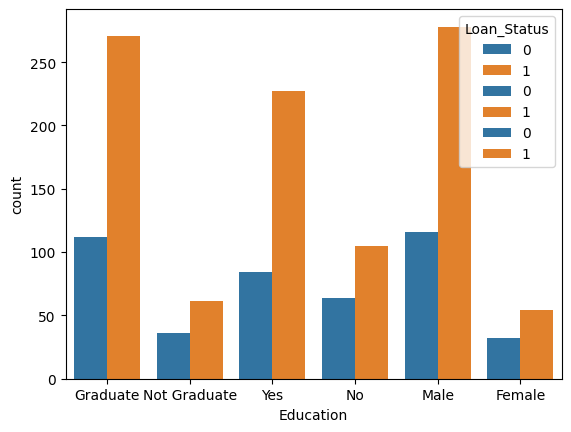

In [ ]:
# Data Visulization

#Education - Loan Status
sns.countplot(x='Education',hue = 'Loan_Status',data=dataset)

#Martial Status - Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=dataset)

#Gender - Loan Status
sns.countplot(x='Gender',hue='Loan_Status',data=dataset)

In [ ]:
#Converting Categorical Data to Numerical Values - Gender, Education , Maritial Status , Property_Area
dataset.replace({'Married' : {'No' : 0 , 'Yes' : 1},
                 "Gender" : {'Male' : 1 , 'Female' :0},
                 'Self_Employed' : {'No' : 0 , 'Yes' : 1} ,
                 'Education' : {'Graduate' : 1 , 'Not Graduate' : 0},
                 'Property_Area' : {'Rural' : 0 ,'Urban' : 2 , 'Semiurban' : 1}}, inplace= True)

dataset.head()

/tmp/ipython-input-70-3378111927.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'Married' : {'No' : 0 , 'Yes' : 1},


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
# Seprating Data and Labels
X = dataset.drop(columns=['Loan_ID', 'Loan_Status'] , axis = 1)
Y = dataset['Loan_Status']

print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [ ]:
# spliting Training and Testing Data

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

print(X.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


In [ ]:
#Training the Model - SVM (Support Vector Machine)

model = svm.SVC(kernel = 'linear')

In [ ]:
model.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
# Model Evaluation - Accuracy Score on training data
X_train_prediction = model.predict(X_train)
X_train_accuracy = accuracy_score(X_train_prediction,Y_train)

print("Accuracy on training data : ",X_train_accuracy)

Accuracy on training data :  0.7986111111111112


In [ ]:
# Model Evaluation - Accuracy Score on test data

X_test_prediction = model.predict(X_test)
X_test_accuracy = accuracy_score(X_test_prediction,Y_test)

print("Accuracy on test data : ",X_test_accuracy)

Accuracy on test data :  0.8333333333333334


# Making a Predective System

In [ ]:
input_data = (1,0,3,1234,0,0,1234,360,180,360,1)

#changing the input data to a numpy array
input_data_as_numpy = np.asarray(input_data)

#reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 0):
  print("The loan is not approved")
else:
  print("The loan is approved")

[1]
The loan is approved


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
